<a href="https://colab.research.google.com/github/k-vinamr/rera_construction_pred/blob/main/12_floor_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
data = pd.read_excel('12_floor_data.xlsx')

In [3]:
data.head()

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,12th floor Columns casting,12th Floor slab casting,Brick work of 10th to 12th Floor,"Electrical concealed, PVC Fitting, plastering at 9th-12th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work
0,VVM Group,Residential/Group Housing,2021-09-09,2021-12-30,4083.00,1600.00,12,MAHARASHTRA,112,0.972504,...,1.053546,1.701881,3.646889,4.214182,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259
1,AUM G M HEIGHTS,Residential/Group Housing,2021-09-09,2021-12-30,7402.75,2715.70,12,MAHARASHTRA,112,0.972504,...,1.053546,1.701881,3.646889,4.214182,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259
2,SUDARSHAN DEVELOPERS,Residential/Group Housing,2021-09-09,2021-12-30,4194.18,2799.45,12,MAHARASHTRA,112,0.972504,...,1.053546,1.701881,3.646889,4.214182,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259
3,KAMALRAJ ASSOCIATES,Residential/Group Housing,2021-09-09,2021-12-30,5359.95,5359.95,12,MAHARASHTRA,112,0.972504,...,1.053546,1.701881,3.646889,4.214182,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259
4,RIGHT CHANNEL CONSTRUCTION PVT LTD,Residential/Group Housing,2021-09-09,2021-12-31,4566.76,3158.80,12,MAHARASHTRA,113,0.981187,...,1.062952,1.717077,3.679450,4.251809,6.950072,7.358900,7.358900,6.132417,7.358900,2.452967


In [4]:
data.describe()

,total_built_up_area_saleable_area,total_area_of_project,floor,total_days,Cleaning & survey,"Excavation,leveling & P.C.C for Basement B1","Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring",Slab of B (bottom),Ground Floor slab casting,1st floor Columns casting,...,12th floor Columns casting,12th Floor slab casting,Brick work of 10th to 12th Floor,"Electrical concealed, PVC Fitting, plastering at 9th-12th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work
count,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,10609.012024,6970.085108,12.0,1062.137349,9.222611,23.056527,23.056527,11.528264,13.833916,9.222611,...,9.991162,16.139569,34.584791,39.964647,65.326827,69.169581,69.169581,57.641318,69.169581,23.056527
std,13091.783583,12599.517382,0.0,613.701003,5.328808,13.322019,13.322019,6.661009,7.993211,5.328808,...,5.772875,9.325413,19.983028,23.091499,37.745720,39.966057,39.966057,33.305047,39.966057,13.322019
min,293.800000,198.700000,12.0,112.000000,0.972504,2.431259,2.431259,1.215630,1.458755,0.972504,...,1.053546,1.701881,3.646889,4.214182,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259
25%,2825.385000,1442.500000,12.0,523.000000,4.541245,11.353111,11.353111,5.676556,6.811867,4.541245,...,4.919682,7.947178,17.029667,19.678726,32.167149,34.059334,34.059334,28.382779,34.059334,11.353111
50%,5766.170000,2864.550000,12.0,1056.000000,9.169320,22.923300,22.923300,11.461650,13.753980,9.169320,...,9.933430,16.046310,34.384949,39.733719,64.949349,68.769899,68.769899,57.308249,68.769899,22.923300
75%,12004.720000,6166.810000,12.0,1436.000000,12.468886,31.172214,31.172214,15.586107,18.703329,12.468886,...,13.507959,21.820550,46.758321,54.031838,88.321274,93.516643,93.516643,77.930535,93.516643,31.172214
max,80960.400000,118960.520000,12.0,3196.000000,27.751085,69.377713,69.377713,34.688857,41.626628,27.751085,...,30.063676,48.564399,104.066570,120.254703,196.570188,208.133140,208.133140,173.444284,208.133140,69.377713


In [5]:
# Converting date columns to datetime objects
data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], format='%d-%m-%Y', errors='coerce')
data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], format='%d-%m-%Y', errors='coerce')


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 66 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   organisation_name                                                          415 non-null    object        
 1   project_category                                                           415 non-null    object        
 2   actual_commencement_date                                                   415 non-null    datetime64[ns]
 3   estimated_finish_date                                                      415 non-null    datetime64[ns]
 4   total_built_up_area_saleable_area                                          415 non-null    float64       
 5   total_area_of_project                                                      415 non-null    float64       
 6   fl

In [7]:
current_date = datetime.now()


In [8]:
data['duration_since_commencement'] = (current_date - data['actual_commencement_date']).dt.days
data['remaining_duration'] = (data['estimated_finish_date'] - current_date).dt.days
data['progress_ratio'] = data['duration_since_commencement'] / data['total_days']

In [9]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
data['current_stage'] = data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
data


,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,other work,duration_since_commencement,remaining_duration,progress_ratio,current_stage
0,VVM Group,Residential/Group Housing,2021-09-09,2021-12-30,4083.00,1600.00,12,MAHARASHTRA,112,0.972504,...,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259,790,-679,7.053571,completed
1,AUM G M HEIGHTS,Residential/Group Housing,2021-09-09,2021-12-30,7402.75,2715.70,12,MAHARASHTRA,112,0.972504,...,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259,790,-679,7.053571,completed
2,SUDARSHAN DEVELOPERS,Residential/Group Housing,2021-09-09,2021-12-30,4194.18,2799.45,12,MAHARASHTRA,112,0.972504,...,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259,790,-679,7.053571,completed
3,KAMALRAJ ASSOCIATES,Residential/Group Housing,2021-09-09,2021-12-30,5359.95,5359.95,12,MAHARASHTRA,112,0.972504,...,6.888567,7.293777,7.293777,6.078148,7.293777,2.431259,790,-679,7.053571,completed
4,RIGHT CHANNEL CONSTRUCTION PVT LTD,Residential/Group Housing,2021-09-09,2021-12-31,4566.76,3158.80,12,MAHARASHTRA,113,0.981187,...,6.950072,7.358900,7.358900,6.132417,7.358900,2.452967,790,-678,6.991150,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Rajasthan Housing Board,Residential/Group Housing,2020-10-01,2027-12-31,51529.14,15846.42,12,Rajasthan,2647,22.984081,...,162.803907,172.380608,172.380608,143.650507,172.380608,57.460203,1133,1513,0.428032,running
411,DREAMZ REALTY,Residential/Group Housing,2023-07-02,2030-12-31,5945.46,5945.46,12,MAHARASHTRA,2739,23.782923,...,168.462373,178.371925,178.371925,148.643271,178.371925,59.457308,129,2609,0.047097,running
412,Aoudumber Developers,Residential/Group Housing,2021-03-11,2028-12-31,6137.37,769.00,12,MAHARASHTRA,2852,24.764110,...,175.412446,185.730825,185.730825,154.775687,185.730825,61.910275,972,1879,0.340813,running
413,Swamiraj Creators,Residential/Group Housing,2022-06-15,2030-12-31,5338.95,3100.00,12,MAHARASHTRA,3121,27.099855,...,191.957308,203.248915,203.248915,169.374096,203.248915,67.749638,511,2609,0.163730,running


In [10]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
data['area_bin'] = pd.cut(data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    data_min = grouped[feature].min()
    data_max = grouped[feature].max()
    data_mean = grouped[feature].mean()
    data_count = grouped[feature].count()
    result = pd.concat([data_min, data_max, data_mean, data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         797.0   842.0   819.500000      2
(500, 1000]      241.0  1365.0   761.750000     12
(1000, 1500]     128.0  1239.0   596.133333     15
(1500, 2000]     119.0  2334.0   798.100000     30
(2000, 2500]     134.0  2149.0   778.903226     31
...                ...     ...          ...    ...
(78500, 79000]     NaN     NaN          NaN      0
(79000, 79500]     NaN     NaN          NaN      0
(79500, 80000]     NaN     NaN          NaN      0
(80000, 80500]     NaN     NaN          NaN      0
(80500, 81000]  2647.0  2647.0  2647.000000      1

[162 rows x 4 columns]




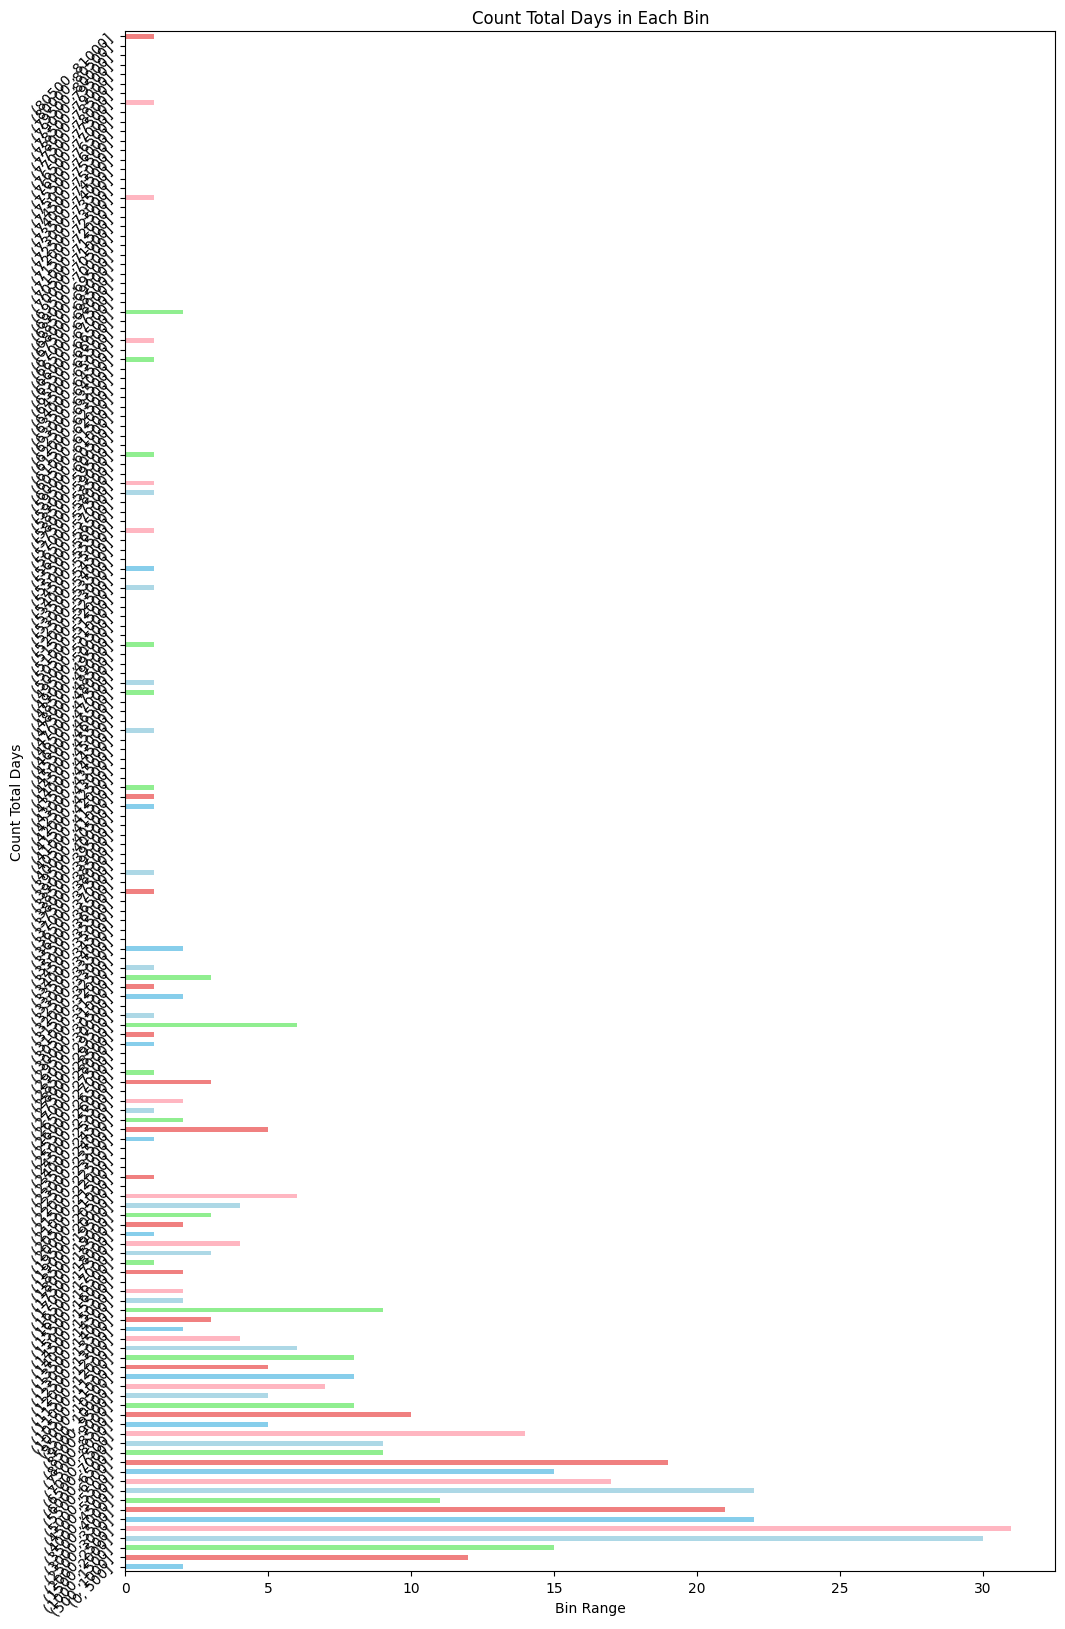

In [11]:
# Create a bar chart for the mean values
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightpink']
plt.figure(figsize=(12, 20))
data_count.plot(kind='barh', color=colors)
plt.xlabel('Bin Range')
plt.ylabel('Count Total Days')
plt.title('Count Total Days in Each Bin')
plt.yticks(range(len(data_count)), data_count.index, rotation=45)
plt.show()

In [12]:
# Filter the DataFrame based on the condition
filtered_data = data[data['total_built_up_area_saleable_area'] < 40000]

In [13]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(filtered_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = filtered_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    filtered_data_min = grouped[feature].min()
    filtered_data_max = grouped[feature].max()
    filtered_data_mean = grouped[feature].mean()
    filtered_data_count = grouped[feature].count()
    result = pd.concat([filtered_data_min, filtered_data_max, filtered_data_mean, filtered_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         797.0   842.0   819.500000      2
(500, 1000]      241.0  1365.0   761.750000     12
(1000, 1500]     128.0  1239.0   596.133333     15
(1500, 2000]     119.0  2334.0   798.100000     30
(2000, 2500]     134.0  2149.0   778.903226     31
...                ...     ...          ...    ...
(34500, 35000]     NaN     NaN          NaN      0
(35000, 35500]     NaN     NaN          NaN      0
(35500, 36000]  1279.0  1279.0  1279.000000      1
(36000, 36500]     NaN     NaN          NaN      0
(36500, 37000]   974.0   974.0   974.000000      1

[74 rows x 4 columns]




<ipython-input-13-3ac3ef85beec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)


In [14]:
import pandas as pd
import random
from datetime import timedelta

# Assuming you have your filtered data in a DataFrame named filtered_df
# Ensure you have loaded the necessary libraries and data

# Define the number of data points you want to generate
desired_data_points = 10000  # Change this numbr as needed

# Create an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=filtered_data.columns)

# Copy the original data to the augmented DataFrame
augmented_data = augmented_data.append(filtered_data, ignore_index=True)

# Define the range for small changes (you can adjust this)
date_change_range = 7  # Number of days for date changes
area_change_range = 10  # Range for changing area

# Generate additional data points
while len(augmented_data) < desired_data_points:
    # Randomly select an existing row to modify
    index_to_modify = random.randint(0, len(filtered_data) - 1)
    row_to_modify = augmented_data.iloc[index_to_modify].copy()

    # Make small changes to the selected row
    row_to_modify['actual_commencement_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['estimated_finish_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['total_built_up_area_saleable_area'] += random.uniform(-area_change_range, area_change_range)
    row_to_modify['total_area_of_project'] += random.uniform(-area_change_range, area_change_range)

    # Add the modified row to the augmented DataFrame
    augmented_data = augmented_data.append(row_to_modify, ignore_index=True)

    # You may want to truncate the DataFrame to the desired number of data points
    augmented_data = augmented_data[:desired_data_points]

    # Now, augmented_data contains the augmented data with the specified changes


Streaming output truncated to the last 5000 lines.
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-14-fd421797b636>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_

In [15]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column                                                                     Non-Null Count  Dtype                 
---  ------                                                                     --------------  -----                 
 0   organisation_name                                                          10000 non-null  object                
 1   project_category                                                           10000 non-null  object                
 2   actual_commencement_date                                                   10000 non-null  datetime64[ns]        
 3   estimated_finish_date                                                      10000 non-null  datetime64[ns]        
 4   total_built_up_area_saleable_area                                          10000 non-null  float64               
 5   total_area_of_project                                 

In [16]:
# Define the bin edges
bin_width = 500
max_value = int(augmented_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
augmented_data['area_bin'] = pd.cut(augmented_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = augmented_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    augmented_data_min = grouped[feature].min()
    augmented_data_max = grouped[feature].max()
    augmented_data_mean = grouped[feature].mean()
    augmented_data_count = grouped[feature].count()
    result = pd.concat([augmented_data_min, augmented_data_max, augmented_data_mean, augmented_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")


Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]         775.0   842.0   809.774194     62
(500, 1000]      241.0  1365.0   754.007018    285
(1000, 1500]     128.0  1239.0   612.919571    373
(1500, 2000]     119.0  2334.0   789.751374    728
(2000, 2500]     134.0  2149.0   777.493506    770
...                ...     ...          ...    ...
(34500, 35000]     NaN     NaN          NaN      0
(35000, 35500]     NaN     NaN          NaN      0
(35500, 36000]  1279.0  1279.0  1279.000000     30
(36000, 36500]     NaN     NaN          NaN      0
(36500, 37000]   974.0   974.0   974.000000     18

[74 rows x 4 columns]




In [17]:
augmented_data.to_csv('augmented_12_floor.csv', index=False)